# ROC and PRC Curve
----------------------------------------

- Both ROC and PRC Curve is used for checking the accuracy of binary classifiers.

- ROC curve is used whenever we have balanced data(i.e. both labels and their data is balanced).

- PRC(precision recall curve) is used wheneven we have inbalanced data.

- AUC(Area under Curve) is used to check the validity of accuracy.

- Here we plot ROC and PRC curve using the concept of thresholding. and the thresholding is actually the probability.

**import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**To generate our own sample data we use make_classification method**

In [2]:
data_x, class_label = make_classification(n_samples = 1000, n_classes = 2)

In [3]:
print(data_x)

[[-0.62421037 -0.53490197  0.98479343 ... -0.46648341 -0.40896549
  -0.32472063]
 [ 1.39292241 -1.57400465  0.49201201 ... -0.00274054 -0.71410531
   1.57647177]
 [-0.25569104 -2.7136783  -1.3842227  ... -1.27398393  1.36479808
  -0.25266628]
 ...
 [ 0.29707444 -0.59376771 -0.90990291 ... -1.76813614 -0.60300264
  -0.21610157]
 [-0.90146748  0.07473784  0.73604044 ...  0.89886085 -1.94531457
  -0.90727519]
 [ 1.30832962  0.12294731  0.43269035 ... -0.85020333  0.3014696
   0.75934409]]


In [4]:
print(class_label)

[0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 

**Split the data into train and test sub-datasets**

In [5]:
trainx, testx, trainy, testy = train_test_split(data_x, class_label, test_size =0.2, random_state = 1)

**Fit a model on the train data**

In [24]:
model = LogisticRegression()
model.fit(trainx, trainy)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**predict probabilities/thresholds for the test data**

In [7]:
probs = model.predict_proba(testx)

**keep probabilities of the positive class only**

In [8]:
probs = probs[:, 1]

**compute the AUC score**

In [9]:
auc = roc_auc_score(testy, probs)
print('AUC : %.2f' %auc)

AUC : 0.97


**Defining a function to plot the ROC curve**

In [10]:
def plot_roc_curve(fpr , tpr):
    plt.plot(fpr , tpr , color = 'orange' , label = 'ROC')
    plt.plot([0,1],[0,1], color = 'darkblue' , linestyle = "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC- Receiver Operating Characteristic curve")
    plt.legend()
    plt.show()

In [11]:
fpr , tpr , thresholds = roc_curve(testy, probs)

In [12]:
# fpr value
print(fpr)

[0.   0.   0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06
 0.06 0.07 0.07 0.1  0.1  0.15 0.15 0.43 0.43 1.  ]


In [13]:
# tpr value
print(tpr)

[0.   0.01 0.12 0.12 0.28 0.28 0.62 0.62 0.71 0.71 0.91 0.91 0.92 0.92
 0.95 0.95 0.96 0.96 0.97 0.97 0.99 0.99 1.   1.  ]


In [14]:
# threshold value
print(thresholds)

[1.99874452e+00 9.98744522e-01 9.90233473e-01 9.89435551e-01
 9.67393631e-01 9.62800152e-01 8.74071715e-01 8.71951804e-01
 8.47175757e-01 8.41311036e-01 6.45162068e-01 6.24823729e-01
 6.21860831e-01 6.07266890e-01 5.38548226e-01 5.30378237e-01
 5.18769605e-01 4.40895927e-01 4.31919981e-01 3.21049541e-01
 3.14578920e-01 9.76831985e-02 9.38881204e-02 1.05633091e-03]


**plot ROC curve using user defined method**

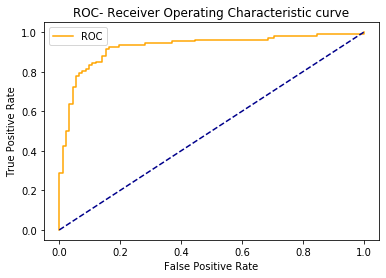

In [22]:
plot_roc_curve(fpr , tpr)

In [15]:
from sklearn.metrics import precision_recall_curve

In [16]:
precision, recall, thresholds  = precision_recall_curve(testy, probs)

In [22]:
def plot_prc_curve(precision, recall):
    plt.plot(recall, precision, color = 'blue', label = "PRC")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRC Curve')
    plt.legend()
    plt.show()

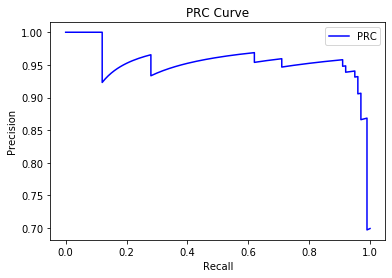

In [23]:
plot_prc_curve(precision,  recall)